<a class="anchor" id="0.1"></a>
# **Table of Contents**
1. [Introduction](#1)
2. [Changelog](#2)
3. [Business Understanding](#3)
4. [Data Understanding](#4)
5. [Data Preperation](#5)
6. [Modeling](#6)
7. [Evaluation](#7)
8. [Improvements](#8)
9. [Conclusion](#9)

# **1. Introduction** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

This notebook will explore the Naive Bayes Classification algorithm by going through the CRISP-DM process. The goal is to gain insight of how to use Bayesian Classifiers in Python and their usefulness. This notebook is heavily insipired by Prashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python) notebook on the same topic. His notebook explores Naive Bayes Classifiers in more depth and provides detailed explanation on how they work. I highly recommend you read his notebook.

# **2. Changelog** <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

Below is the changelog of the modifications made to the [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python) in Python notebook:

- Changed method of accessing data file
- Changed the dataset
- Modified read_csv to use just ',' as a separator and set header to 1
- Removed renaming column step (columns are already in the dataset)
- Fix numpy.float to just float (numpy.float are depreciated)
- Remove sections on variable exploration (there are no missing values in the new dataset)
- Add a try-exception for library imports to catch if library is missing
- Changed encoder to take entire categorical array instead of manually assigning them
- Removed engineering missing value section as there are no missing value
- Modified null_accuracy formula to not rely on user input from prior output (dynamically determined)
- Reorganized notebook to follow CRISP-DM (Business understanding, data understanding, data prep, modeling, eval)
- Reworked evaluation section to match terminology used in class by adding Accuracy, Specificity, and NPV
- Added the formula for F1-Score
- Added an explanation of the T/N/M labels from the dataset
- Added an improvement section to attempt and reduce overfitting
- Added a conclusion section

# **3. Business Understanding** <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

The dataset I will be using for this notebook is the [Differentiated Thyroid Cancer Recurrence](https://www.kaggle.com/datasets/joebeachcapital/differentiated-thyroid-cancer-recurrence). Each record represents a patient that was diagnosed with thyroid cancer. 

For each patient, the data includes information about their gender, age, smoking habits, and more. Some of the labels may be confusing the laymen. Namely the `T`, `N`, and `M` labels. According to an [article](https://www.cancer.ie/cancer-information-and-support/cancer-types/thyroid-cancer/grading-and-staging) by the Irish Cancer Society, `T` indicates how big the tumour was, `N` indicates if there was cancer in the lymph nodes, and `M` (Metastatsis) indicates if the cancer has spread to other parts of the body. 

Ultimately, the record indicates whether the cancer has recurred or not. Our goal with respects to Bayesian Classifiers is to be able to predict whether the cancer will recur using this dataset. 

# **4. Data Understanding** <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

We will now explore our dataset in more depth to gain a deeper understanding of what we're working with. First, we must import useful Python libraries that will be useful in our endeavor.

In [2]:
# This library will help us access our file
try:
    import os
except:
    !pip install os
    import os

# This library is for data processing, and CSV file I/O
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

Next, we can use the os library to access our file directly. I've placed the dataset .csv file in a folder called "Input" in the same directory as this notebook. If your file structure differs from mine, you'll have to modify the code below to match, or you'll have to change your file structure.

In [3]:
current_working_directory = os.getcwd()
file = r'\input\Thyroid_Diff.csv' #this directory may differ for you
data = current_working_directory + file

df = pd.read_csv(data, header=0,sep=',')

Now that the data is imported, we can explore it to gain insights

In [4]:
df.shape

(383, 17)

This tells us that there are 383 instances, and 17 attributes in the data set.

In [5]:
df.head() #preview the top 5 rows

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df.info() #summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

From the summary of the data, we can see that there are no missing values, which means that there will be little data preprocessing or cleanup later in the proccess.

### Explore Categorical Variables

In [7]:
# identify categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables\n')
print(f'The categorical variables are: {categorical}')

There are 16 categorical variables

The categorical variables are: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


### Number of labels: cardinality

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [8]:
# check for cardinality

for var in categorical:
    print(f'{var} contains {len(df[var].unique())} labels')

Gender contains 2 labels
Smoking contains 2 labels
Hx Smoking contains 2 labels
Hx Radiothreapy contains 2 labels
Thyroid Function contains 5 labels
Physical Examination contains 5 labels
Adenopathy contains 6 labels
Pathology contains 4 labels
Focality contains 2 labels
Risk contains 3 labels
T contains 7 labels
N contains 3 labels
M contains 2 labels
Stage contains 5 labels
Response contains 4 labels
Recurred contains 2 labels


We can see that the `T` and `Adenopathy` columns contains a larger number of labels compared to the others.

### Summary of categorical variables


- There are 16 categorical variables. 


- All variables are categorical except for `age`


- `Recurred` is the target variable.


- Our target variable has low cardinality

### Explore Numerical Variables

In [9]:
# identify numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print(f'There are {len(numerical)} numerical variables\n')
print(f'The numerical variables are: {numerical}')

There are 1 numerical variables

The numerical variables are: ['Age']


### Summary of numerical variables


- There is 1 categorical variables(`Age`). 

- The numerical variable is of discrete data type


# **5. Data Preperation** <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

During the Data Analysis step, we noticed that there were no missing variables. However, we will double-check the data in this step to confirm that there are no missing values.

In [10]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

We can see that there are no missing values in the categorical variables.

In [11]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Age    0
dtype: int64

Like with the categorical variables, there are no missing values.

Next, we want to check that all of our values are encoded properly.

In [12]:
for var in categorical:
    print(df[var].value_counts())

Gender
F    312
M     71
Name: count, dtype: int64
Smoking
No     334
Yes     49
Name: count, dtype: int64
Hx Smoking
No     355
Yes     28
Name: count, dtype: int64
Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64
Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64
Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64
Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64
Pathology
Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: count, dtype: int64
Focality
Uni-Focal      247
Multi-Focal    136
Name: count, dtype: 

In [13]:
for var in numerical:
    print(df[var].value_counts())

Age
31    22
27    13
40    12
26    12
28    12
      ..
79     1
18     1
69     1
76     1
78     1
Name: count, Length: 65, dtype: int64


For both categorical and numercial, there are no values encoded as `?`, which confirms that our dataset is complete and contains no missing values.

In [14]:
targetVariable = 'Recurred'
X = df.drop([targetVariable], axis=1)

y = df[targetVariable]

Next, we will split our data into training and test sets.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((268, 16), (115, 16))

We can see that our dataset is split between a training set, and a test set. We are training the model on 70% of the data, and keeping 30% of the data to test our model's predictive ability. We may want to modify these values and see if we can yield better results

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [16]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

Now we will verify that there are no missing values for our training and testing datasets

In [17]:
# check missing values in X_train

X_train.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
dtype: int64

In [18]:
# check missing values in X_test

X_test.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
dtype: int64

Now that we've confirmed there are no missing values in our testing and training sets, we will import a library that will allow us to encode our variables for training.

In [19]:
try:
    import category_encoders as ce # import category encoders
except:
    !pip install category_encoders #install if import fails
    import category_encoders as ce # import category encoders

In [20]:
encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Finally, we will prepare our `X_train` dataset to be fed into the Gaussian Naive Bayes classifier

In [21]:
try:
    from sklearn.preprocessing import RobustScaler
except:
    !pip install sklearn
    from sklearn.preprocessing import RobustScaler

In [22]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# **6. Modeling** <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

Now that we've valided and prepared our data, we are ready to build and train our model using the Bayesian Classifiers algorithm.

In [23]:
try:
    from sklearn.naive_bayes import GaussianNB
except:
    !pip install sklearn
    from sklearn.naive_bayes import GaussianNB

In [24]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
# predict the results using the model
y_pred = gnb.predict(X_test)
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No'],
      dtype='<U3')

# **7. Evaluation** <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

Now that we've trained our model and made a prediction, we can check its accuracy against the training set accuracy.

In [33]:
try:
    from sklearn.metrics import accuracy_score
except:
    !pip install sklearn
    from sklearn.metrics import accuracy_score

y_pred_train = gnb.predict(X_train)
    
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9391
Training-set accuracy score: 0.9701


The training-set accuracy score is 0.9701 while the test-set accuracy to be 0.9391. These two values differ by about 3%, which may be indicative of some of overfitting. This could be due to a lack of data. However, the discreprency is still relatively small, meaning the model should still perform relatively well in a real-world scenario.

We can further evaluate our model by comparing its acuracy with the **null accuracy**.

**Null accuracy** is the accuracy that could be acheived by always predicting the most frequent class.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [27]:
# return the most frequent value
most_frequent = (y_test == "No").sum() if (y_test == "No").sum() >= (y_test == "Yes").sum() else (y_test == "Yes").sum()

null_accuracy = most_frequent/len(y_test)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6870


We can see that our model accuracy score is 0.9391 but null accuracy score is 0.6870. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [28]:
# Print the Confusion Matrix and slice it into four pieces

try:
    from sklearn.metrics import confusion_matrix
except:
    !pip install sklearn
    from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[78  1]
 [ 6 30]]

True Positives(TP) =  78

True Negatives(TN) =  30

False Positives(FP) =  1

False Negatives(FN) =  6


The confusion matrix shows `78 + 30 = 108 correct predictions` and `1 + 6 = 7 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 78


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 30


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 6 `(Type II error)`

<Axes: >

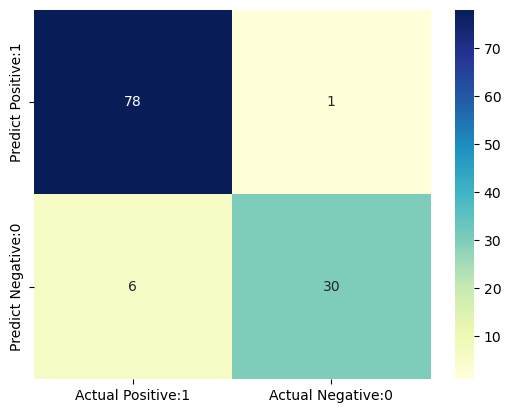

In [29]:
# visualize confusion matrix with seaborn heatmap

try:
    import seaborn as sns # for statistical data visualization
except:
    !pip install seaborn
    import seaborn as sns # for statistical data visualization


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [30]:
try:
    from sklearn.metrics import classification_report
except:
    !pip install sklearn
    from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.93      0.99      0.96        79
         Yes       0.97      0.83      0.90        36

    accuracy                           0.94       115
   macro avg       0.95      0.91      0.93       115
weighted avg       0.94      0.94      0.94       115



### Accuracy
**Accuracy** measures the overall correctness of the predictions. It is a general indicator of how well the model is performing.

Mathematically, accuracy can be defined as the ratio of `(TP + FP) to (TP + FP + FN + TN)`

### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.
#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

### Specificity

**Specificity** represents the propertion of correctly identified actual negatives. It helps us understand how well the model can idenitfy instances that don't belong the the positive class. High specificity is indicative that the model is good at avoiding false positives. Low specificity is indicative that the model is misclassifying negative instances as positive.

Mathematically, specificity can be given as the ratio of `TN to (TN + FP)`

### Negative Predictive Value (NPV)
**NPV** asses the likelihood that a negative prediction is correct. High NPV indicates the model is correctly idenitfying true negatives. Low NPV indicates the model is missclassifying negative instances.

Mathematically, NPV can be given as the ratio of `TN to (TN + FN)`

### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.

Mathematically, f1-score can be given by the following formula: `2 x (Percision x Recall)/(Precision + Recall)`

#### from Phrashant Banerjee [Naive Bayes Classifier in Python](https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python)

In [31]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))

Accuracy : 0.9391
Precision : 0.9873
Recall: 0.9286
Specificity : 0.9677
NPV: 0.8333
F1 Score: 0.9571
Balanced Accuracy: 0.9482


# **8. Improvements** <a class="anchor" id="8"></a>
[Table of Contents](#0.1)

Now that we've evaluated our model, we can reflect on our results and see if there are any improvements to be made.

At `94%`, our accuracy for this model is quite high, which indicates that our model if performing quite well overall. However, when we compared the accuracy of the model to the training-set accuracy, there's a difference of about `3%`. This value is high enough to be indicative of a small level of overfitting within our model. Some ways to remedy this would be to:
- Increase the Size of our dataset
- Identify and eliminate the less significant labels for making predictions

Since we cannot increase the size of the dataset, we can attempt to reduce the number of labels we use to train the model and see if this reduces overfitting.

Looking at our labels, we can identify those that are likely to have a big impact predicting cancer recurrance, and those that don't.

Likely to have a big impact: `Age`, `Gender`, `Smoking`, `Hx Smoking`, `Hx Radiotherapy`, `Adenopathy`, `T`, `N`, `M`, and `Reponse`

Unlikely to have a big impact: `Thyroid Function`, `Physical Examination`, `Pathology`

Some of these are based on assumptions that may be incorrect. Others are based on current thyroid cancer research, such as this [article](https://www.medicalnewstoday.com/articles/thyroid-cancer-recurrence#why-it-returns) that suggests that age and gender can impact thyroid cancer recurrence.

We will now re-train our model with the updated labels and compare our new model to our old model to see if there is reduced overfitting.

In [34]:
# pull the data again
data = current_working_directory + file

df = pd.read_csv(data, header=0,sep=',')

In [35]:
# set the target variable
targetVariable = 'Recurred'
X = df.drop([targetVariable], axis=1)

y = df[targetVariable]

In [37]:
# drop our low-impact labels
X = df.drop(columns=['Thyroid Function', 'Physical Examination', 'Pathology'])

In [38]:
X.shape

(383, 14)

We can see that our dataset has 3 fewer columns from before.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((268, 14), (115, 14))

In [42]:
encoder = ce.OneHotEncoder(cols=X.columns)#use X columns without the dropped columns

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [43]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [44]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
# predict the results using the model
y_pred = gnb.predict(X_test)
y_pred

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No'], dtype='<U3')

Now that we've trained our new model, we can perform our evaluation again and see if it is improved from our previous model.

In [46]:
y_pred_train = gnb.predict(X_train)
    
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 1.0000
Training-set accuracy score: 1.0000


We can see that after removing unecessary labels from our model, the accuracy score of the algorithm increased to 100% from 94%. Our training set accuracy is also 100% which means there is no overfitting in the model. 

In [49]:
# print the confusion matrix again

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[79  0]
 [ 0 36]]

True Positives(TP) =  79

True Negatives(TN) =  36

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

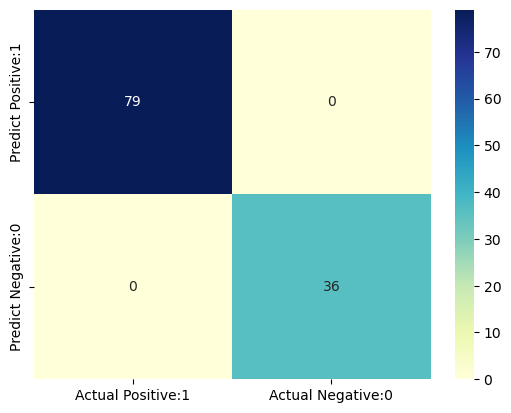

In [52]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Consistent with our 100% accuracy, we can see there are no false positives or negatives in the matrix.

In [50]:
# re-print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        79
         Yes       1.00      1.00      1.00        36

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



In [51]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
accuracy = (TP + TN) / float(TP + TN + FP + FN)
f1_score = 2*((precision * recall) / (precision + recall))
balanced_accuracy = (recall + specificity) / 2

print('Accuracy : {0:0.4f}'.format(accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('NPV: {0:0.4f}'.format(negative_predictive_value))
print('F1 Score: {0:0.4f}'.format(f1_score))
print('Balanced Accuracy: {0:0.4f}'.format(balanced_accuracy))

Accuracy : 1.0000
Precision : 1.0000
Recall: 1.0000
Specificity : 1.0000
NPV: 1.0000
F1 Score: 1.0000
Balanced Accuracy: 1.0000


# **9. Conclusion** <a class="anchor" id="9"></a>
[Table of Contents](#0.1)


Looking back on what we've acheived in this notebook, we've successfully gone through the phases of CRISP-DM to generate a machine learning model that can accurately predict the recurrance of thyroid cancer. 
1. `Business Understanding`: This phase helped us understand what our data represents so we could make better understand how to train our model to make predictions.
2. `Data Understanding`: This phase showed us what type of data we were working with, and how to organize it to train our model.
3. `Data Preperation`: This step confirmed that the data was complete and no cleanup was necessary. Had we worked with imperfect data, this step would have allowed us to clean up missing or incorrect values. We also organized our data into training and testing sets.
4. `Modeling`: In this step we were able to use our training set to train the model, and validate it using the testing set.
5. `Evaluation`: In this step, we were able to use a confusion matrix and identify an overfitting issue with our model.
6. `Improvements`: After identifying an overfitting issue, we were able to revisit our business understanding to improve the model by removing labels that were unlikely to have a big impact on the predictivity of the model, and show an improvement by performing an evaluation on the new model.